<a href="https://colab.research.google.com/github/ajaymathew522/Internship_questions/blob/master/Innovative_Tech_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


#Used Octoparse to collect the data

In [ ]:
df = pd.read_csv('ExploreCrowdfundingC.csv', )
df.head()

,Name,Raised,Currency,Percentage,Category,Status
0,Bluetti AC200 - Most Versatile Solar Power Sta...,"$4,456,386",USD raised,44564%,Energy & Green Tech,12 days left
1,Stoggles : Stylish Protection For Your Eyes,"$444,820",USD raised,8896%,Fashion & Wearables,21 days left
2,BackOSage 8 in 1 Decompression Massage Belt,"$12,359",USD raised,618%,Fashion & Wearables,29 days left
3,Blocc : Face Shield Designed for Style and Com...,"$641,835",USD raised,9811%,Fashion & Wearables,InDemand
4,Move It Swift: Smart Boxing Gloves,"$355,515",HKD raised,917%,Health & Fitness,27 days left


In [ ]:
df.shape

(252, 6)

In [ ]:
df1 = df.copy()

#Removing currency symbols and commas

In [ ]:
df1['Raised'] = df1['Raised'].str.replace(',','')
df1['Raised'] = df1['Raised'].str.replace('$','')
df1['Raised'] = df1['Raised'].str.replace('€','')
df1['Raised'] = df1['Raised'].str.replace('£','')
df1['Raised'] = df1['Raised'].str.replace('Fr ','')
df1['Raised'] = df1['Raised'].str.replace('Kr','')
df1.head()

,Name,Raised,Currency,Percentage,Category,Status
0,Bluetti AC200 - Most Versatile Solar Power Sta...,4456386,USD raised,44564%,Energy & Green Tech,12 days left
1,Stoggles : Stylish Protection For Your Eyes,444820,USD raised,8896%,Fashion & Wearables,21 days left
2,BackOSage 8 in 1 Decompression Massage Belt,12359,USD raised,618%,Fashion & Wearables,29 days left
3,Blocc : Face Shield Designed for Style and Com...,641835,USD raised,9811%,Fashion & Wearables,InDemand
4,Move It Swift: Smart Boxing Gloves,355515,HKD raised,917%,Health & Fitness,27 days left


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        252 non-null    object
 1   Raised      251 non-null    object
 2   Currency    251 non-null    object
 3   Percentage  251 non-null    object
 4   Category    252 non-null    object
 5   Status      252 non-null    object
dtypes: object(6)
memory usage: 11.9+ KB


#Removing the Percentage sign

In [ ]:
df1['Percentage'] = df1['Percentage'].str.replace('%','')
df1.head()

,Name,Raised,Currency,Percentage,Category,Status
0,Bluetti AC200 - Most Versatile Solar Power Sta...,4456386,USD raised,44564,Energy & Green Tech,12 days left
1,Stoggles : Stylish Protection For Your Eyes,444820,USD raised,8896,Fashion & Wearables,21 days left
2,BackOSage 8 in 1 Decompression Massage Belt,12359,USD raised,618,Fashion & Wearables,29 days left
3,Blocc : Face Shield Designed for Style and Com...,641835,USD raised,9811,Fashion & Wearables,InDemand
4,Move It Swift: Smart Boxing Gloves,355515,HKD raised,917,Health & Fitness,27 days left


In [ ]:
df1 = df1.drop(177)
df1.shape

(251, 6)

#Converting the object types to int

In [ ]:
df1['Percentage'] = df1['Percentage'].astype(str).astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 0 to 251
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        251 non-null    object
 1   Raised      251 non-null    object
 2   Currency    251 non-null    object
 3   Percentage  251 non-null    int64 
 4   Category    251 non-null    object
 5   Status      251 non-null    object
dtypes: int64(1), object(5)
memory usage: 13.7+ KB


In [ ]:
df1['Raised'] = df1['Raised'].astype(str).astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 0 to 251
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        251 non-null    object
 1   Raised      251 non-null    int64 
 2   Currency    251 non-null    object
 3   Percentage  251 non-null    int64 
 4   Category    251 non-null    object
 5   Status      251 non-null    object
dtypes: int64(2), object(4)
memory usage: 13.7+ KB


#Creating seperate dataframes according to status

In [ ]:
df_ended = df1[df1['Status']=='Ended']
df_ended.shape

(25, 6)

In [ ]:
df_indemand = df1[df1['Status'] == 'InDemand']
df_indemand.shape

(99, 6)

In [ ]:
df_normal = df1[(df1['Status'] != 'Ended') & (df1['Status']!='InDemand')]
df_normal.shape

(127, 6)

In [ ]:
df_normal.head()

,Name,Raised,Currency,Percentage,Category,Status
0,Bluetti AC200 - Most Versatile Solar Power Sta...,4456386,USD raised,44564,Energy & Green Tech,12 days left
1,Stoggles : Stylish Protection For Your Eyes,444820,USD raised,8896,Fashion & Wearables,21 days left
2,BackOSage 8 in 1 Decompression Massage Belt,12359,USD raised,618,Fashion & Wearables,29 days left
4,Move It Swift: Smart Boxing Gloves,355515,HKD raised,917,Health & Fitness,27 days left
5,SIRUI 35mm Anamorphic Lens,1028860,USD raised,10289,Camera Gear,26 days left


In [ ]:
from sklearn.preprocessing import StandardScaler


#We will only be using the normal dataframe for classification because the "Ended" ones cannot be invested into and "In demand" ones are already a good option

In [ ]:
X = StandardScaler().fit_transform(df_normal[['Raised','Percentage']])

#Using K means to classify the dataframe. We find 3 should be the number of clusters

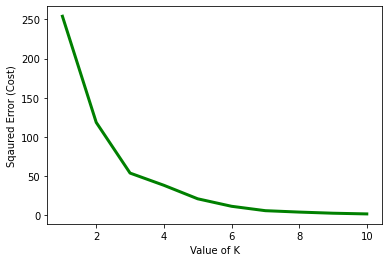

In [ ]:
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(X) 
    cost.append(KM.inertia_)      
  

plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() 
  



In [ ]:
k_means = KMeans(n_clusters=3)
model = k_means.fit(X)
model
y_hat = k_means.predict(X)

In [ ]:
y_hat.shape

(127,)

In [ ]:
df_normal.shape

(127, 6)

In [ ]:
df2 = pd.DataFrame({'Cluster':y_hat})
df2.head()

,Cluster
0,1
1,0
2,0
3,0
4,0


In [ ]:
df3 = pd.merge(df_normal, df2, left_on=df_normal.index, right_on=df2.index)

In [ ]:
df3.head()

,key_0,Name,Raised,Currency,Percentage,Category,Status,Cluster
0,0,Bluetti AC200 - Most Versatile Solar Power Sta...,4456386,USD raised,44564,Energy & Green Tech,12 days left,1
1,1,Stoggles : Stylish Protection For Your Eyes,444820,USD raised,8896,Fashion & Wearables,21 days left,0
2,2,BackOSage 8 in 1 Decompression Massage Belt,12359,USD raised,618,Fashion & Wearables,29 days left,0
3,4,Move It Swift: Smart Boxing Gloves,355515,HKD raised,917,Health & Fitness,27 days left,0
4,5,SIRUI 35mm Anamorphic Lens,1028860,USD raised,10289,Camera Gear,26 days left,2


There were severe power outages at home, so I couldn't give the best answer to the question.